<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

Sets from:

https://www.kaggle.com/datasets/saurabh00007/diabetescsv

https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset  ...Cancer.csv

In [6]:
import numpy as np
from sklearn.cluster import KMeans

The numpy library is used to handle matrixes.

sklearn.cluster is used for the KMeans.

<b>Exercise 1: Clustering </b>

Normalizing

In [7]:
# Normalizing functionm, since it is always recommended to normalize data before use.
def normalizeXData(dataX):
    meanValue = dataX.mean(axis=0)                                                  #   Compute mean µi.
    stadardDev = dataX.std(axis=0)                                                  #   Compute standard deviation σi.  
    return (dataX - meanValue)/stadardDev                                           # Compute normalized Xn in as Xn = (X − µ)/σ. 

Normalizing features removes different effects from different units.

Without nomralization some features can "starve" each other.

Bk-means

In [8]:
def kmeans(X,iter):
    km = KMeans(n_clusters=2, n_init = iter).fit(X)    # Run k-means on largest cluster.
    return km.labels_

def bkmeans(X, k, max_iter):
    # 1, Start with a single cluster including all the observations in the data set.
    clusters = kmeans(X, max_iter)
    counter = 2
    
    #  2, Bisecting Divide the largest cluster into two smaller sub-clusters using k-Means
    while counter < k:
        clusterId, counts = np.unique(clusters, return_counts = True)              # Find the unique elements. With number of times each appears.
        largestClusterIndex = np.argmax(counts)                                    # Get the id of the largest cluster.
        largestindexes = np.nonzero(clusters == clusterId[largestClusterIndex])[0] # Check if it within current clusters, and get the indexes in largest cluster.
        largestCluster = X[largestindexes]                                         # Recieve the values for the indexes from the largest cluster.
        subCluster = kmeans(largestCluster, max_iter)                              # Split into two smaller clusters.
        subClusterindexes = np.nonzero(subCluster == 0)[0]                         # Return indexes of the new sub cluster. Choose the best solution according to SSE
        indexes = largestindexes[subClusterindexes]                                # Add the subcluster indexes to array.
        clusters[indexes] = counter                                                # Update current cluster with the subclusters indexes.
        counter += 1                                                               # Increase the counter, for next round.
    return clusters                                                                # Return clusters when done.

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

data1 = np.loadtxt('breast_cancer_data.csv', delimiter=',', skiprows=1)
data2 = np.loadtxt('diabetes.csv', delimiter=',',skiprows=1)
data3 = np.loadtxt('cancer.csv', delimiter=',', skiprows=1)

# Normalize and save as 
sets = []
set1 =  normalizeXData(data1[:500,:])  # Breast cancer
set2 = normalizeXData(data2[:500,:])   # Diabetes 
set3 = np.c_[data3[:500,1:], data3[:500,0:1] ] # Reoder the columns.   # Heart failure

setnames = ['Breast Cancer', 'Diabets', 'Cancer'] # The names of the sets.

# Name of the labels for each set.
names = []
names.append(['MeanRadius','MeanTexture','MeanPerimeter','Mean_area','MeanSmoothness','Diagnosis'])
names.append(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
names.append(['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'])

print(names[0])
sets.append(set1) # Append t o array.
sets.append(set2) # Append t o array.
sets.append(set3) # Append t o array.

['MeanRadius', 'MeanTexture', 'MeanPerimeter', 'Mean_area', 'MeanSmoothness', 'Diagnosis']


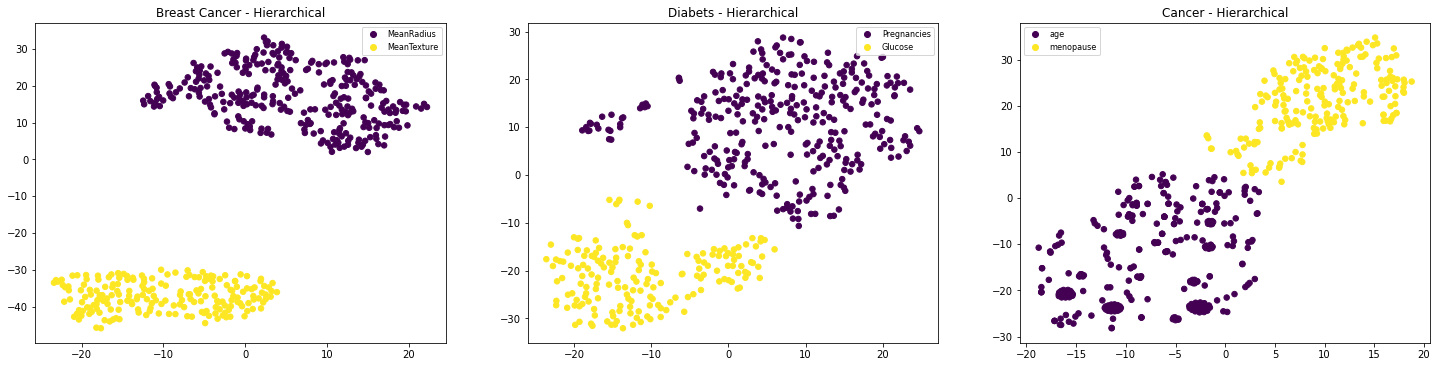

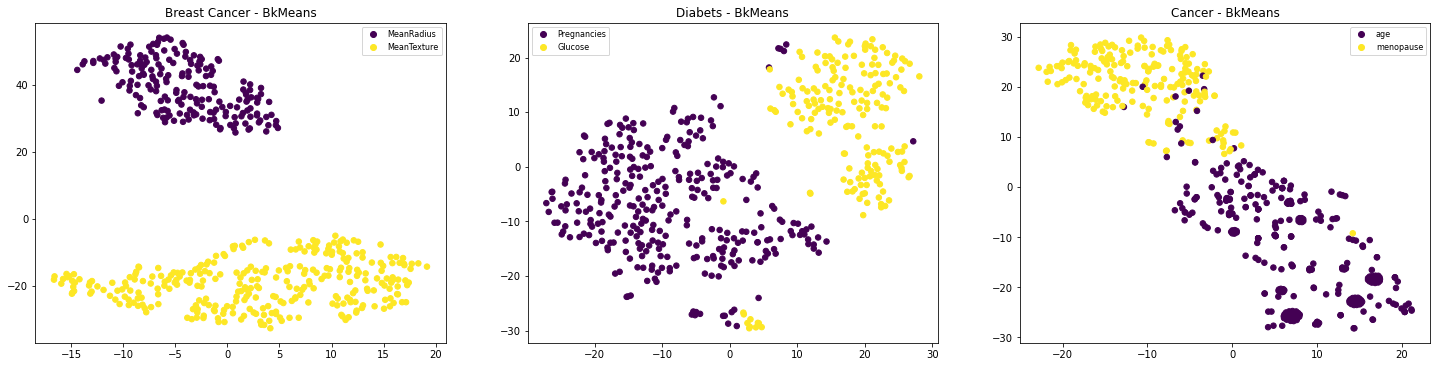

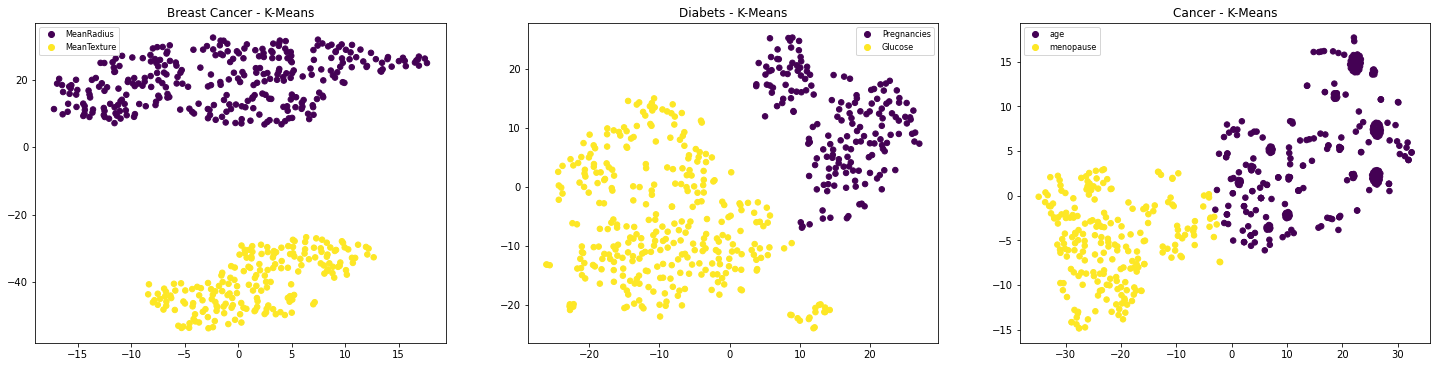

In [10]:
# Plot using PCA.
size = 30  # Size of points.
plt.figure(figsize=(25, 20))
for i in range(1,4):
    plt.subplot(3,3, i)
    plt.title( str(setnames[i-1]) +' - Hierarchical')                                                   # Set title t-SNE.
    tsneY = TSNE(n_components=2).fit_transform(sets[i-1])                                        # DR data with t-SNE.
    hierY =  AgglomerativeClustering(n_clusters=2).fit_predict(tsneY)
    scatter = plt.scatter(tsneY[:,0], tsneY[:,1],s = size, c=hierY)         # Scatter, and us target value to decied color points.
    plt.legend(handles=scatter.legend_elements()[0], prop={'size': 8}, labels=names[i-1])
  
# Plot using t-SNE.
plt.figure(figsize=(25, 20))
for i in range(1,4):
    plt.subplot(3,3, i)
    plt.title( str(setnames[i-1]) +' - BkMeans')                                                                  # Set title Bk-Means.
    tsneY = TSNE(n_components=2).fit_transform(sets[i-1])                                                   # DR data with t-SNE.
    bkmeansY = bkmeans(tsneY, len(names[i-1]), 2)                                             # Cluster data using bk-means implentation.
    scatter = plt.scatter(tsneY[:,0], tsneY[:,1],s = size, c=sets[i-1][:,-1])          # Scatter, and us target value to decied color poin
    plt.legend(handles=scatter.legend_elements()[0], prop={'size': 8}, labels=names[i-1])


# Plot using Sammon implementation.
plt.figure(figsize=(25, 20))
for i in range(1,4):
    plt.subplot(3,3, i)
    plt.title( str(setnames[i-1]) +' - K-Means')                               # Set title K-Means.
    tsneY = TSNE(n_components=2).fit_transform(sets[i-1])               # DR data with t-SNE.
    hierY =  KMeans(n_clusters=2).fit_predict(tsneY)
    scatter = plt.scatter(tsneY[:,0], tsneY[:,1],s = size, c=hierY)         # Scatter, and us target value to decied color points.ts.
    plt.legend(handles=scatter.legend_elements()[0], prop={'size': 8}, labels=names[i-1])
plt.show()

I used t-SNE for this exercise since it was the winner for me on the previous one. t-SNE was used to reduce the dimension and then Hierarchical, bK-Means and K-Means where used to cluster the data.

Looking at all the methods the winners here are K-means and Hierarchical (Agglomerative Clustering).

When comparing these two it is really hard to pick a winnner. Hierarchical seems to be more clear on some while K-Means is more clear on others. I can't really pick a winner here.

What is easier to do is to pick the worse method, which should be Bk-Means. This can either be due to the implenatation, or it may be just worse than the other two.

We should also keep in mind that the result from the k-means may varry on each run, which means that it can sometimes be better and other times worse. This is due to the random start point.

So when it comes to a single run the hierarchical method is always easy to read, since it does not depend on a random start point. There for hierarchical can be seen as a winner on a single random run.
